# Logistic Regression
>fuente: bank marketing campagin data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder
import pickle

## Descripción del problema
#### El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

## Recopilación de datos

In [3]:
df = pd.read_csv('/workspaces/adamcn10-intro-ml/data/raw/bank-marketing-campaign-data.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Análisis Descriptivo

>Forma de los datos e indormación de estos

In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Observaciones- Conclusiones
>- El DataFrame consta de 41188 entradas correspondientes a clientes del banco con 21 columnas cada una correspondientes a datos de estos.
>- Encontramos 10 datos númericos de los cuales 5 son decimales y 5 son enteros. Encontramos también 11 variables categoricas donde se encuentra nuestra variable objetivo y que corresponde a si el cliente contrata o no un deposito a largo plazo.
>- Ningun dato contiene elementos nulos por lo que podriamos decir que los datos están completos.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


>Observamos también cuantos valores únicos tienen cada una de las variables.

In [7]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

#### Observaciones - Conclusiones
>- Vemos muchos valores diferentes en 'duration' porque es la duración del contacto previo en segundos, y por lo tanto puede tener mucha variabilidad.
>- En tasa del euribor 3 meses también vemos variación pero no demasiada como para alarmarnos.
>- El tercer valor con más variación es la edad, pero con el desctibe anterior hemos visto que los valores estan comprendidos en un rango razonable entre 17 y 98 años.

## Limpieza de datos

### Eliminación de duplicados

In [8]:
df.duplicated().sum()

np.int64(12)

>Vemos que en el DataFrame encontramos 12 filas de datos duplicados por lo que los eliminaremos con drop_duplicates

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

>La nueva matriz sin duplicados consta de 41176 entradas en vez de las 41188 anteriores

### Eliminación de la información irrelevante

>A priori no veo ninguna información que sea ciertamente irrelevante, veremos más adelante cuales parecen no influir demasiado al no ver ninguna correlación.

## Análisis de Variables

### Análisis de Variables Univariante

#### Análisis de Variables Univariante Categóricas

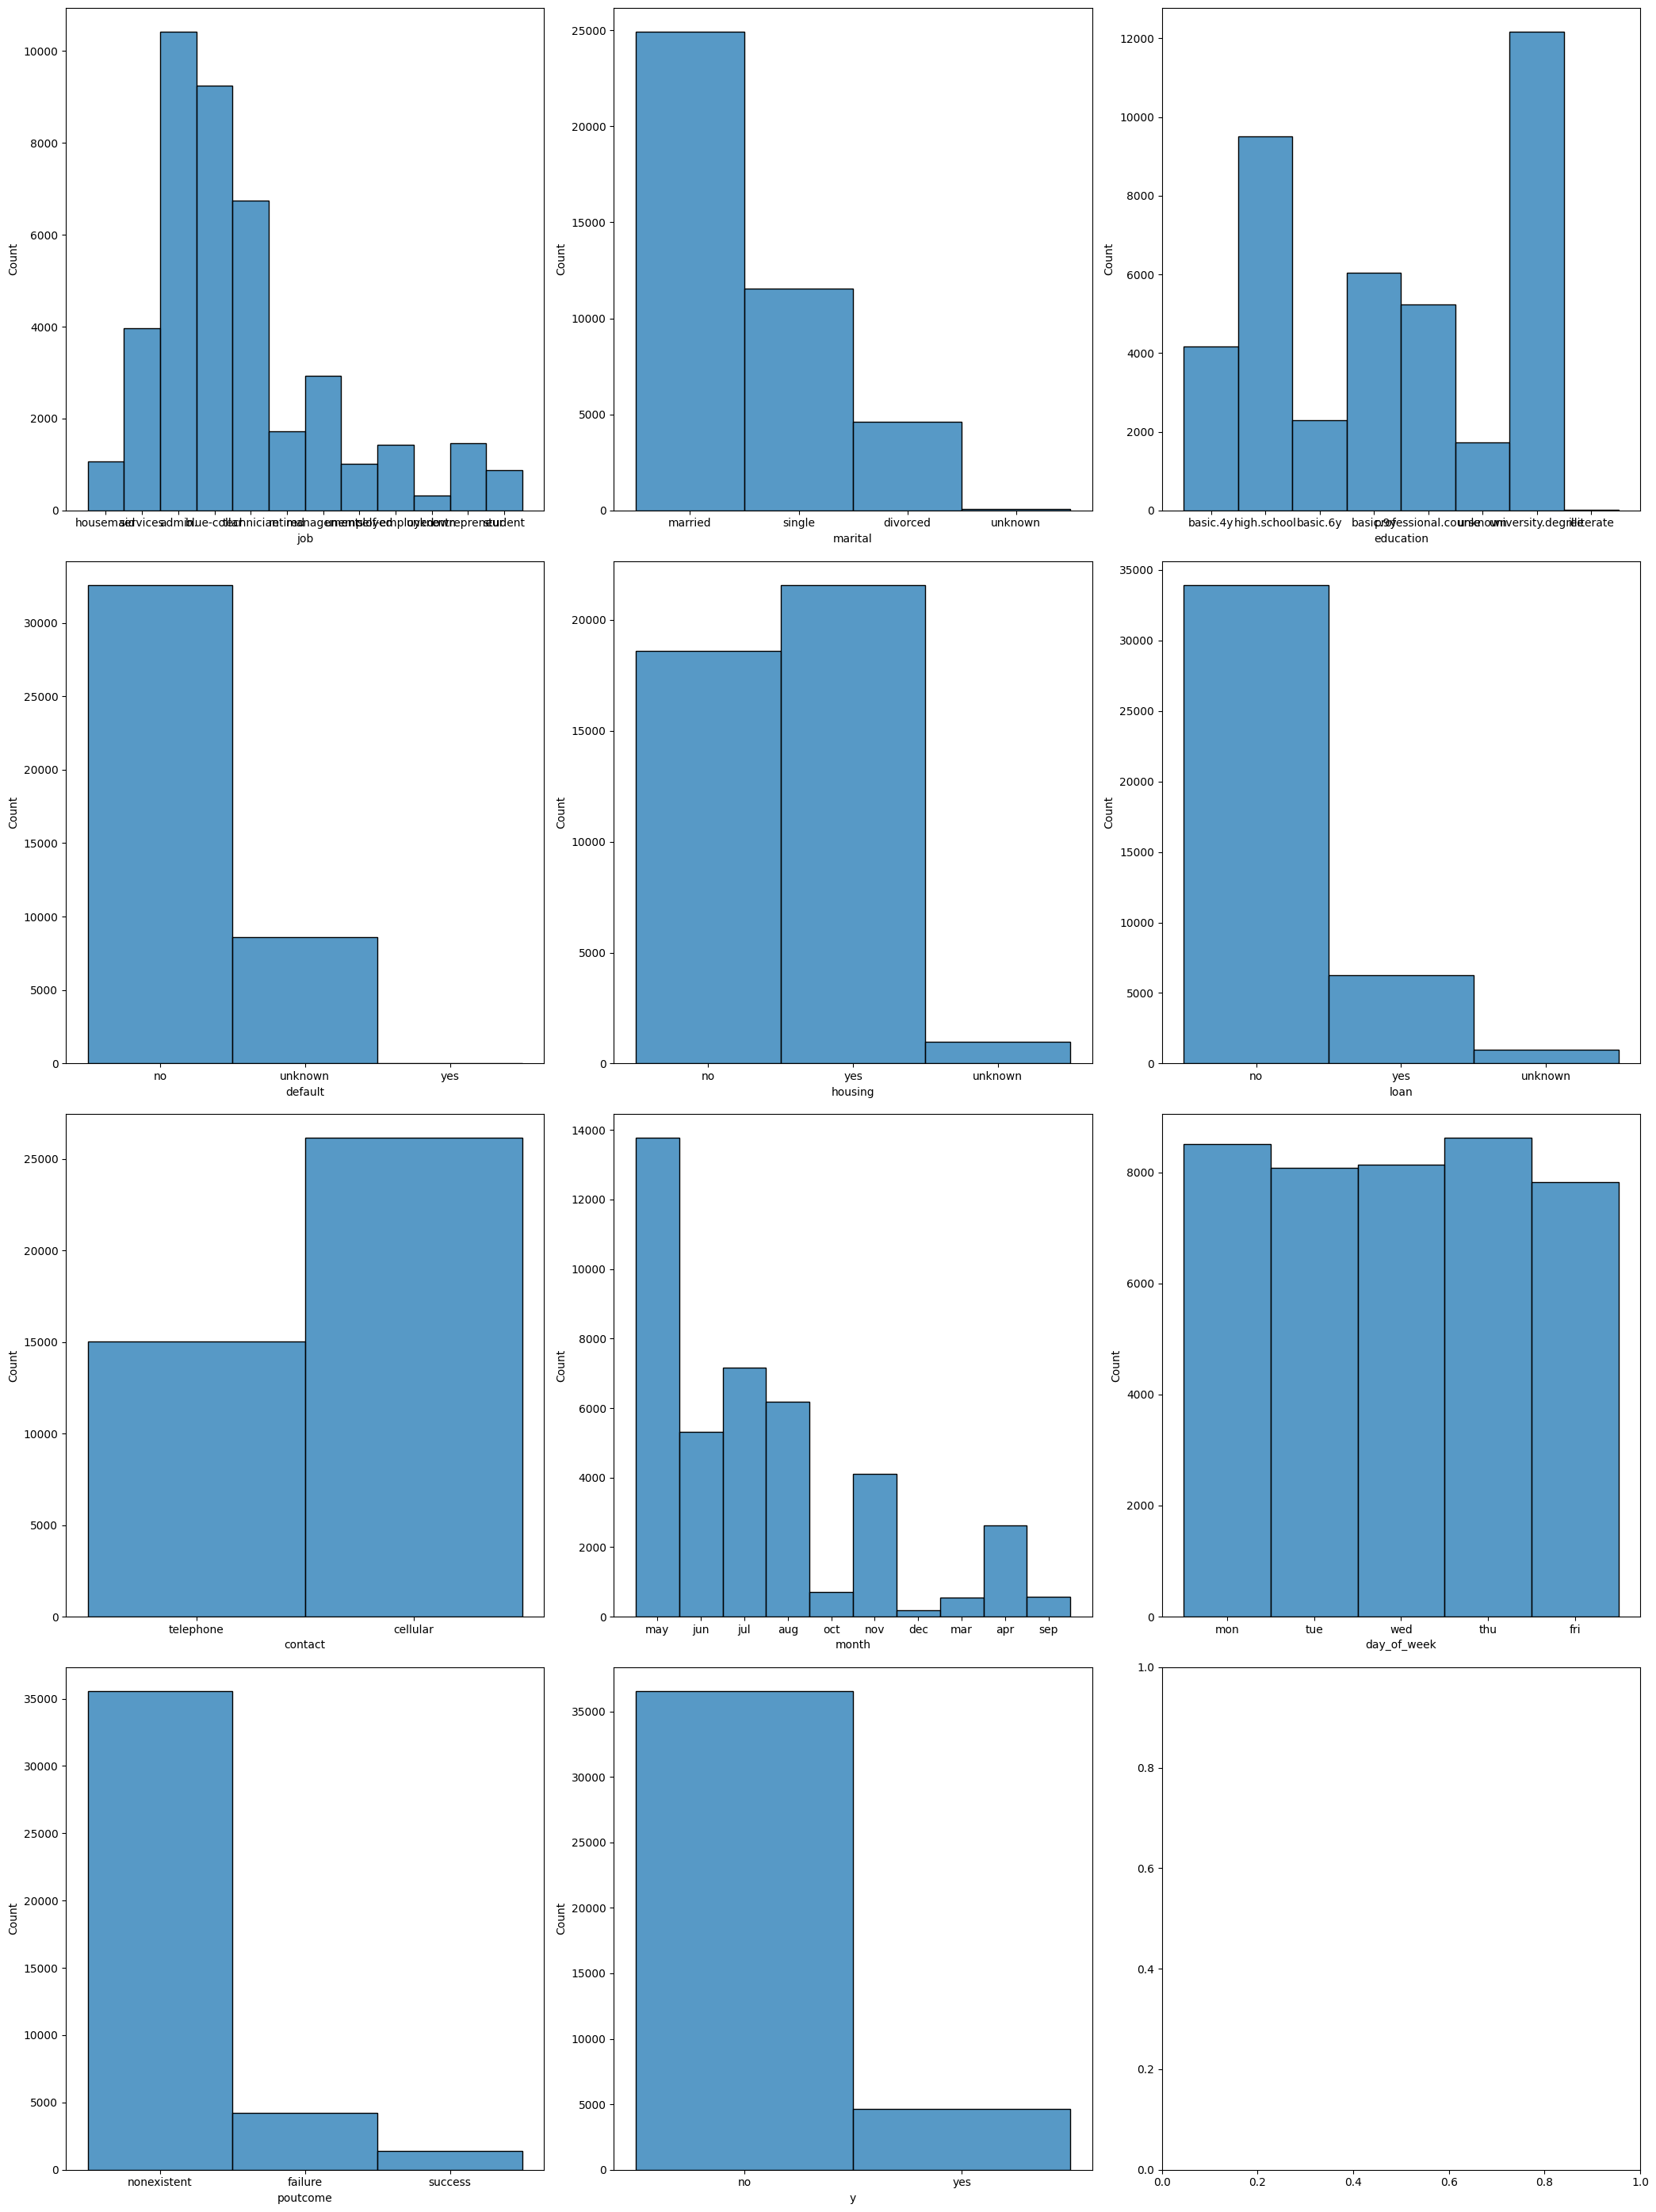

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(21,28))
sns.histplot(ax=axs[0, 0], data=df, x="job")
sns.histplot(ax=axs[0, 1], data=df, x="marital")
sns.histplot(ax=axs[0, 2], data=df, x="education")
sns.histplot(ax=axs[1, 0], data=df, x="default")
sns.histplot(ax=axs[1, 1], data=df, x="housing")
sns.histplot(ax=axs[1, 2], data=df, x="loan")
sns.histplot(ax=axs[2, 0], data=df, x="contact")
sns.histplot(ax=axs[2, 1], data=df, x="month")
sns.histplot(ax=axs[2, 2], data=df, x="day_of_week")
sns.histplot(ax=axs[3, 0], data=df, x="poutcome")
sns.histplot(ax=axs[3, 1], data=df, x="y")
plt.tight_layout()
plt.show()

##### Observaciones - Conclusiones
>- Respecto al trabajo vemos 3 trabajos mayoritarios, 2 secundarios y el resto minoritarios.
>- Proporcionalmente vemos muchisimos más casados que solteros o divorciados, además vemos algo más del doble de solteros que de divorciados.
>- La mayroía de clientes tienen estudios universitarios, seguidos por los clientes que simplemente superaron el instituto.
>- En cuanto a si tienen crédito actualmente solo vemos valores de No y desconocidos.
>- Vemos más clientes con un prestamo para la vivienda muy seguidos de los que no tienen, pero también vemos unos pocos datos desconocidos.
>- En lo que hace referencia a prestamos personales, la gran mayoría de los clientes no tienen ningún prestamo personal, hay pocos clientes que sí y también tenemos algunos resultados desconocidos.
>- Respecto al medio de contacto la mayoría tienen por teléfono móvil pero seguido bastante de los teléfonos fijos.
>- Mayo fue el més con más últimos contactos, el resto están muy cercanos entre si quitando octubre, diciembre, marzo y setiembre con muy pocos últimos contactos.
>- En cuanto a los dias de la semana, la repartición está bastante equiparada de lunes a viernes.
>- La mayoría de clientes no fueron contactados en la campaña anterior de marqueting, pero de los pocos que sí, solo resultaron favorables cerca de un tercio respecto a los que fueron desfavorables.
>- Respecto a la variable objetivo, vemos cerca de siete veces más No que Sí.

#### Análisis de Variables Univariante Numéricas

<function matplotlib.pyplot.show(close=None, block=None)>

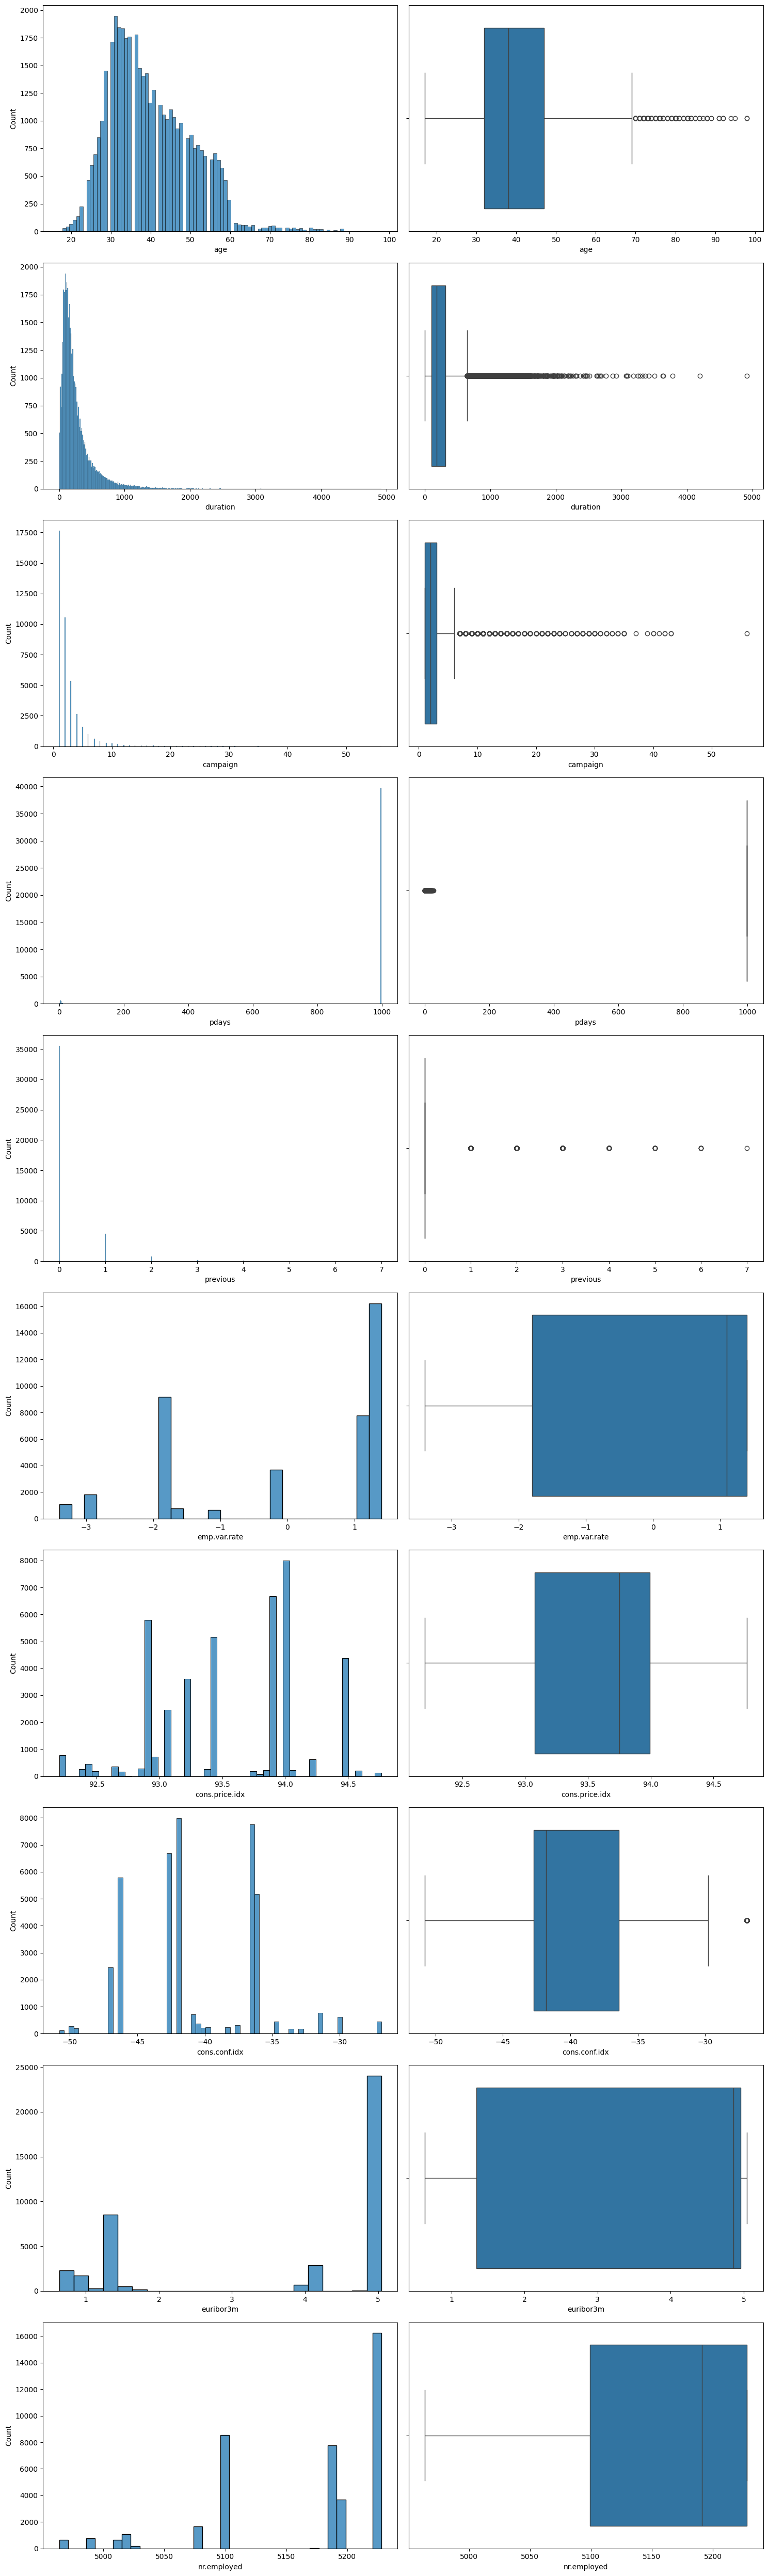

In [11]:
fig, axis = plt.subplots(10, 2, figsize=(15, 50))
sns.histplot(ax=axis[0, 0], data=df, x="age")
sns.boxplot(ax=axis[0, 1], data=df, x="age")
sns.histplot(ax=axis[1, 0], data=df, x="duration")
sns.boxplot(ax=axis[1, 1], data=df, x="duration")
sns.histplot(ax=axis[2, 0], data=df, x="campaign")
sns.boxplot(ax=axis[2, 1], data=df, x="campaign")
sns.histplot(ax=axis[3, 0], data=df, x="pdays")
sns.boxplot(ax=axis[3, 1], data=df, x="pdays")
sns.histplot(ax=axis[4, 0], data=df, x="previous")
sns.boxplot(ax=axis[4, 1], data=df, x="previous")
sns.histplot(ax=axis[5, 0], data=df, x="emp.var.rate")
sns.boxplot(ax=axis[5, 1], data=df, x="emp.var.rate")
sns.histplot(ax=axis[6, 0], data=df, x="cons.price.idx")
sns.boxplot(ax=axis[6, 1], data=df, x="cons.price.idx")
sns.histplot(ax=axis[7, 0], data=df, x="cons.conf.idx")
sns.boxplot(ax=axis[7, 1], data=df, x="cons.conf.idx")
sns.histplot(ax=axis[8, 0], data=df, x="euribor3m")
sns.boxplot(ax=axis[8, 1], data=df, x="euribor3m")
sns.histplot(ax=axis[9, 0], data=df, x="nr.employed")
sns.boxplot(ax=axis[9, 1], data=df, x="nr.employed")

plt.tight_layout()
plt.show

##### Observaciones - Conclusiones
>- Edad: Vemos unos valores centralizados entre 30 y 40 años con una subida pronunciada desde los 17 y una bajada lenta hasta los 60 y una cola larga con pocos valores desde 60 hasta el final con pocos valores por número. También vemos outliers.
>- Duración: Vemos la mayoría de valores agrupados al principio, desde el principio con una larga cola por la derecha con muchos outliers muy alejados al final.
>- Contactos: La gran mayoría de clientes solo han sido contactados una vez y muchos menos clientes por cada contacto más. Con varios outliers cafa vez más alejados.
>- pdays: La mayoría de dias transcurridos desde la anterior campaña hasta el contacto son 999 y los pocos restantes se encuentran entre 0 y 30
>- previous: La mayoría de clientes en la campaña anterior son 0, luego encontramos outliers entre 1 y 7 con cantidades descendentes.
>- Tasa variación empleo: los valores se encuentran entre -4 y 2 con picos en torno a -2 y 1.
>- Índice de precios: Los valores se encuentran entre 92 y 95 con dos picos en torno a 94 y cuatro picos más en torno a 94.5, 93, 93.5 y en medio de estas dos últimas.
>- Índice de confianza: Los valores se encuentran mayoritariamente entre -30 y -50 con picos cercanos a -37, -42.5, y -47. con un valor outlier mayor de -30.
>- Tasa EURIBOR: Los valores se encuentran entre 0 y 5 con un gran pico en 5 y uno más pequeño entre 1 y 2.
>- Número de empleados: Los valores se encuentran entre 4950 y 5250 con un gran pico cercano a 5250 y dos más pequeños en torno a 5100 y 5200.

### Análisis de Variable Multivariable

#### Análisis numérico-numérico

#### Análisis categórico-categórico